# Titanic: Machine Learning from Disaster
https://www.kaggle.com/c/titanic Kaggle

https://blog.csdn.net/Koala_Tree/article/details/78725881

https://blog.csdn.net/wydyttxs/article/details/76695205

https://www.cnblogs.com/ECJTUACM-873284962/p/7129206.html?utm_source=debugrun&utm_medium=referral 特征选择

## Data  Import

In [2]:
import re#正则表达式
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sns.set_style('whitegrid')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [3]:
train=train_data.copy()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

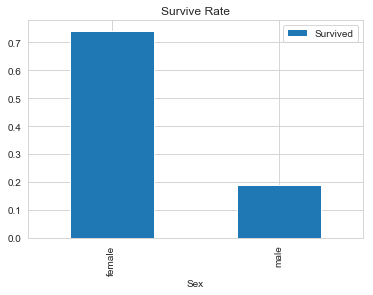

In [7]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.title('Survive Rate')

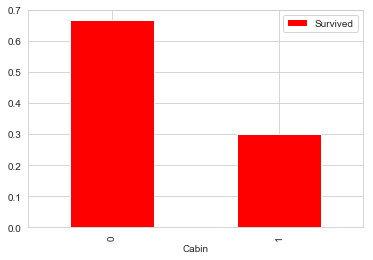

In [23]:
#train['Cabin'][train_data['Cabin'].isnull()==0]=0
#train['Cabin'][train_data['Cabin'].isnull()==1]=1
pt=pd.pivot_table(train,index=['Cabin'],values=['Survived']).plot.bar(color='r')

Text(0.5,1,'Survive Rate')

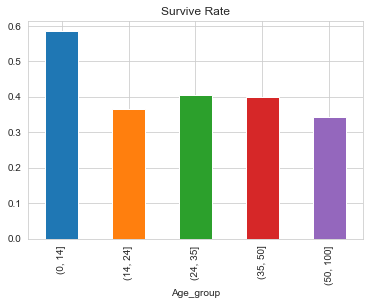

In [55]:
bins = [0,  14,24,35,50, 100]
train['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train.groupby('Age_group')['Survived'].mean()
by_age.plot(kind='bar')
plt.title('Survive Rate')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


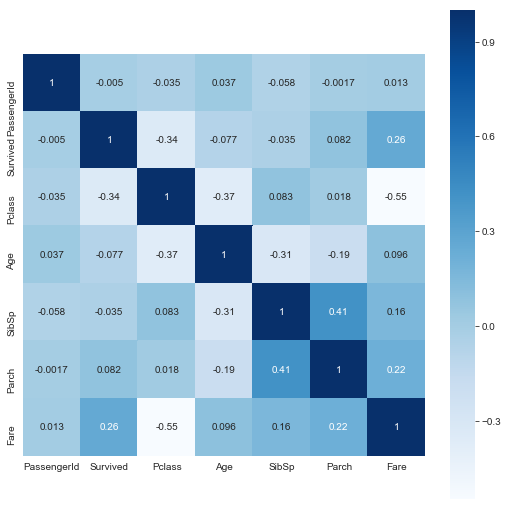

In [56]:
dfData = train_data.corr()
plt.subplots(figsize=(9, 9)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
train_data.describe()

# Feature Selection

<img src="https://github.com/kayseloy/kay/blob/master/20140620165421265.png"
style="width:600px;height:230px;float:left">

## -Generation
<img src="https://github.com/kayseloy/kay/blob/master/20140620165505515.jpg"
style="width:630px;height:320px;float:left">

## -Evaluation
### 独立性准则
独立性准则通常应用在**过滤器模型**的特征选择算法中，试图通过训练数据的内在特性对所选择的特征子集进行评价，独立于特定的学习算法。通常包括：距离度置、信息度量，关联性度量和一致性度量。

**在做比较通用的特征选择方法**时，建议采用这种方法，因为这是独立于特定机器学习算法的，适用于大多数后续机器学习方法
### 关联性度量
关联准则通常应用在**封装器模型**的特征选择算法中，先确定一个学习算法并且利机器学习算法的性能作为评价准则。对于特定的学习算法来说，通常可以找到比过滤器模型更好的特征子集，但是需要多次调用学习算法，一般时间开销较大，并且可能不适介其它学习算法。

在我们做**模式分类算法**时，可以根据自己的实际情况，采用关联性度量方法，这样能更好地和我们的分类方法相结合，通常能找到比较好的子集。

|Methods| 独立性准则 | 关联性度量| 
----|----|-----
|advantage|通用，独立于特定算法|  对于关联分类算法可能是最优的|
|disadvantage|效果一般|  对其他算法不适用|
|functions|卡方检验\距离\相关性\信息增益|分类器|

### **Functions**

* 卡方检验(X,2-test)

卡方检验最基本的思想就是通过观察实际值与理论值的偏差来确定理论的正确与否.具体做的时候常常先假设两个变量确实是独立的（“原假设”）,然后观察实际值（观察值）与理论值（这个理论值是指“如果两者确实独立”的情况下应该有的值）的偏差程度,如果偏差足够小,我们就认为误差是很自然的样本误差,是测量手段不够精确导致或者偶然发生的,两者确确实实是独立的,此时就接受原假设；如果偏差大到一定程度,使得这样的误差不太可能是偶然产生或者测量不精确所致,我们就认为两者实际上是相关的,即否定原假设,而接受备择假设.

理论值为E,实际值为x,偏差程度的计算公式为：$$\sum^n_{i=1} \cfrac {(x_{i}-E)^2}{E}$$

这个式子就是开方检验使用的差值衡量公式.当提供了数个样本的观察值x1,x2,……xi,……xn之后,代入到式中就可以求得开方值,用这个值与事先设定的阈值比较,如果大于阈值（即偏差很大）,就认为原假设不成立,反之则认为原假设成立

* 相关性(Correlation)

运用相关性来度量特征子集的好坏是基于这样一个假设：好的特征子集所包含的特征应该是与分类的相关度较高（相关度高），而特征之间相关度较低的（冗余度低）。

可以使用线性相关系数(correlationcoefficient) 来衡量向量之间线性相关度。

* 距离(Distance Metrics)

运用距离度量进行特征选择是基于这样的假设：好的特征子集应该使得属于同一类的样本距离尽可能小，属于不同类的样本之间的距离尽可能远。同样基于此种思想的有fisher判别分类方法。

常用的距离度量（相似性度量）包括：欧氏距离、标准化欧氏距离、马氏距离etc。

* 信息增益(Information Gain) 

信息增益最大的问题(对于多分类存在这个问题，对于二分类则不存在)还在于它只能考察特征对整个系统的贡献,而不能具体到某个类别上,这就使得它只适合用来做所谓“全局”的特征选择（指所有的类都使用相同的特征集合）,而无法做“本地”的特征选择（每个类别有自己的特征集合,因为有的词,对这个类别很有区分度,对另一个类别则无足轻重）.

同时，信息熵会偏向于特征的分布较多的特征，所以改进方法是可以尝试信息增益率。


